In [56]:
import os
import talib as ta
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [57]:
BASE_PATH = "../data/stock_data/"
APPL_PATH = os.path.join(BASE_PATH, "AAPL.csv")
AMZN_PATH = os.path.join(BASE_PATH, "AMZN.csv")
GOOG_PATH = os.path.join(BASE_PATH, "GOOG.csv")
META_PATH = os.path.join(BASE_PATH, "META.csv")
MSFT_PATH = os.path.join(BASE_PATH, "MSFT.csv")
NVDA_PATH = os.path.join(BASE_PATH, "NVDA.csv")

## loading data

In [58]:
# read the historical datas into separate variables
appl_df = pd.read_csv(APPL_PATH)
amzm_df = pd.read_csv(AMZN_PATH)
goog_df = pd.read_csv(GOOG_PATH)
meta_df = pd.read_csv(META_PATH)
msft_df = pd.read_csv(MSFT_PATH)
nvda_df = pd.read_csv(NVDA_PATH)

#check the columns
print(appl_df.columns)
print(amzm_df.columns)
print(goog_df.columns)
print(meta_df.columns)
print(msft_df.columns)
print(nvda_df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


## convert the date column from object to datetime format

In [59]:
appl_df["Date"] = pd.to_datetime(appl_df["Date"])
amzm_df["Date"] = pd.to_datetime(amzm_df["Date"])
goog_df["Date"] = pd.to_datetime(goog_df["Date"])
meta_df["Date"] = pd.to_datetime(meta_df["Date"])
msft_df["Date"] = pd.to_datetime(msft_df["Date"])
nvda_df["Date"] = pd.to_datetime(nvda_df["Date"])

## Stock Data Analysis
## Plotting Open, Close , High and Low Prices vs 

(3774, 6)
(3774, 6)
(3774, 6)
(3774, 6)
(3774, 6)
(2923, 6)
(3774, 6)
(2923, 6)
(3774, 6)
(3774, 6)
(3774, 6)


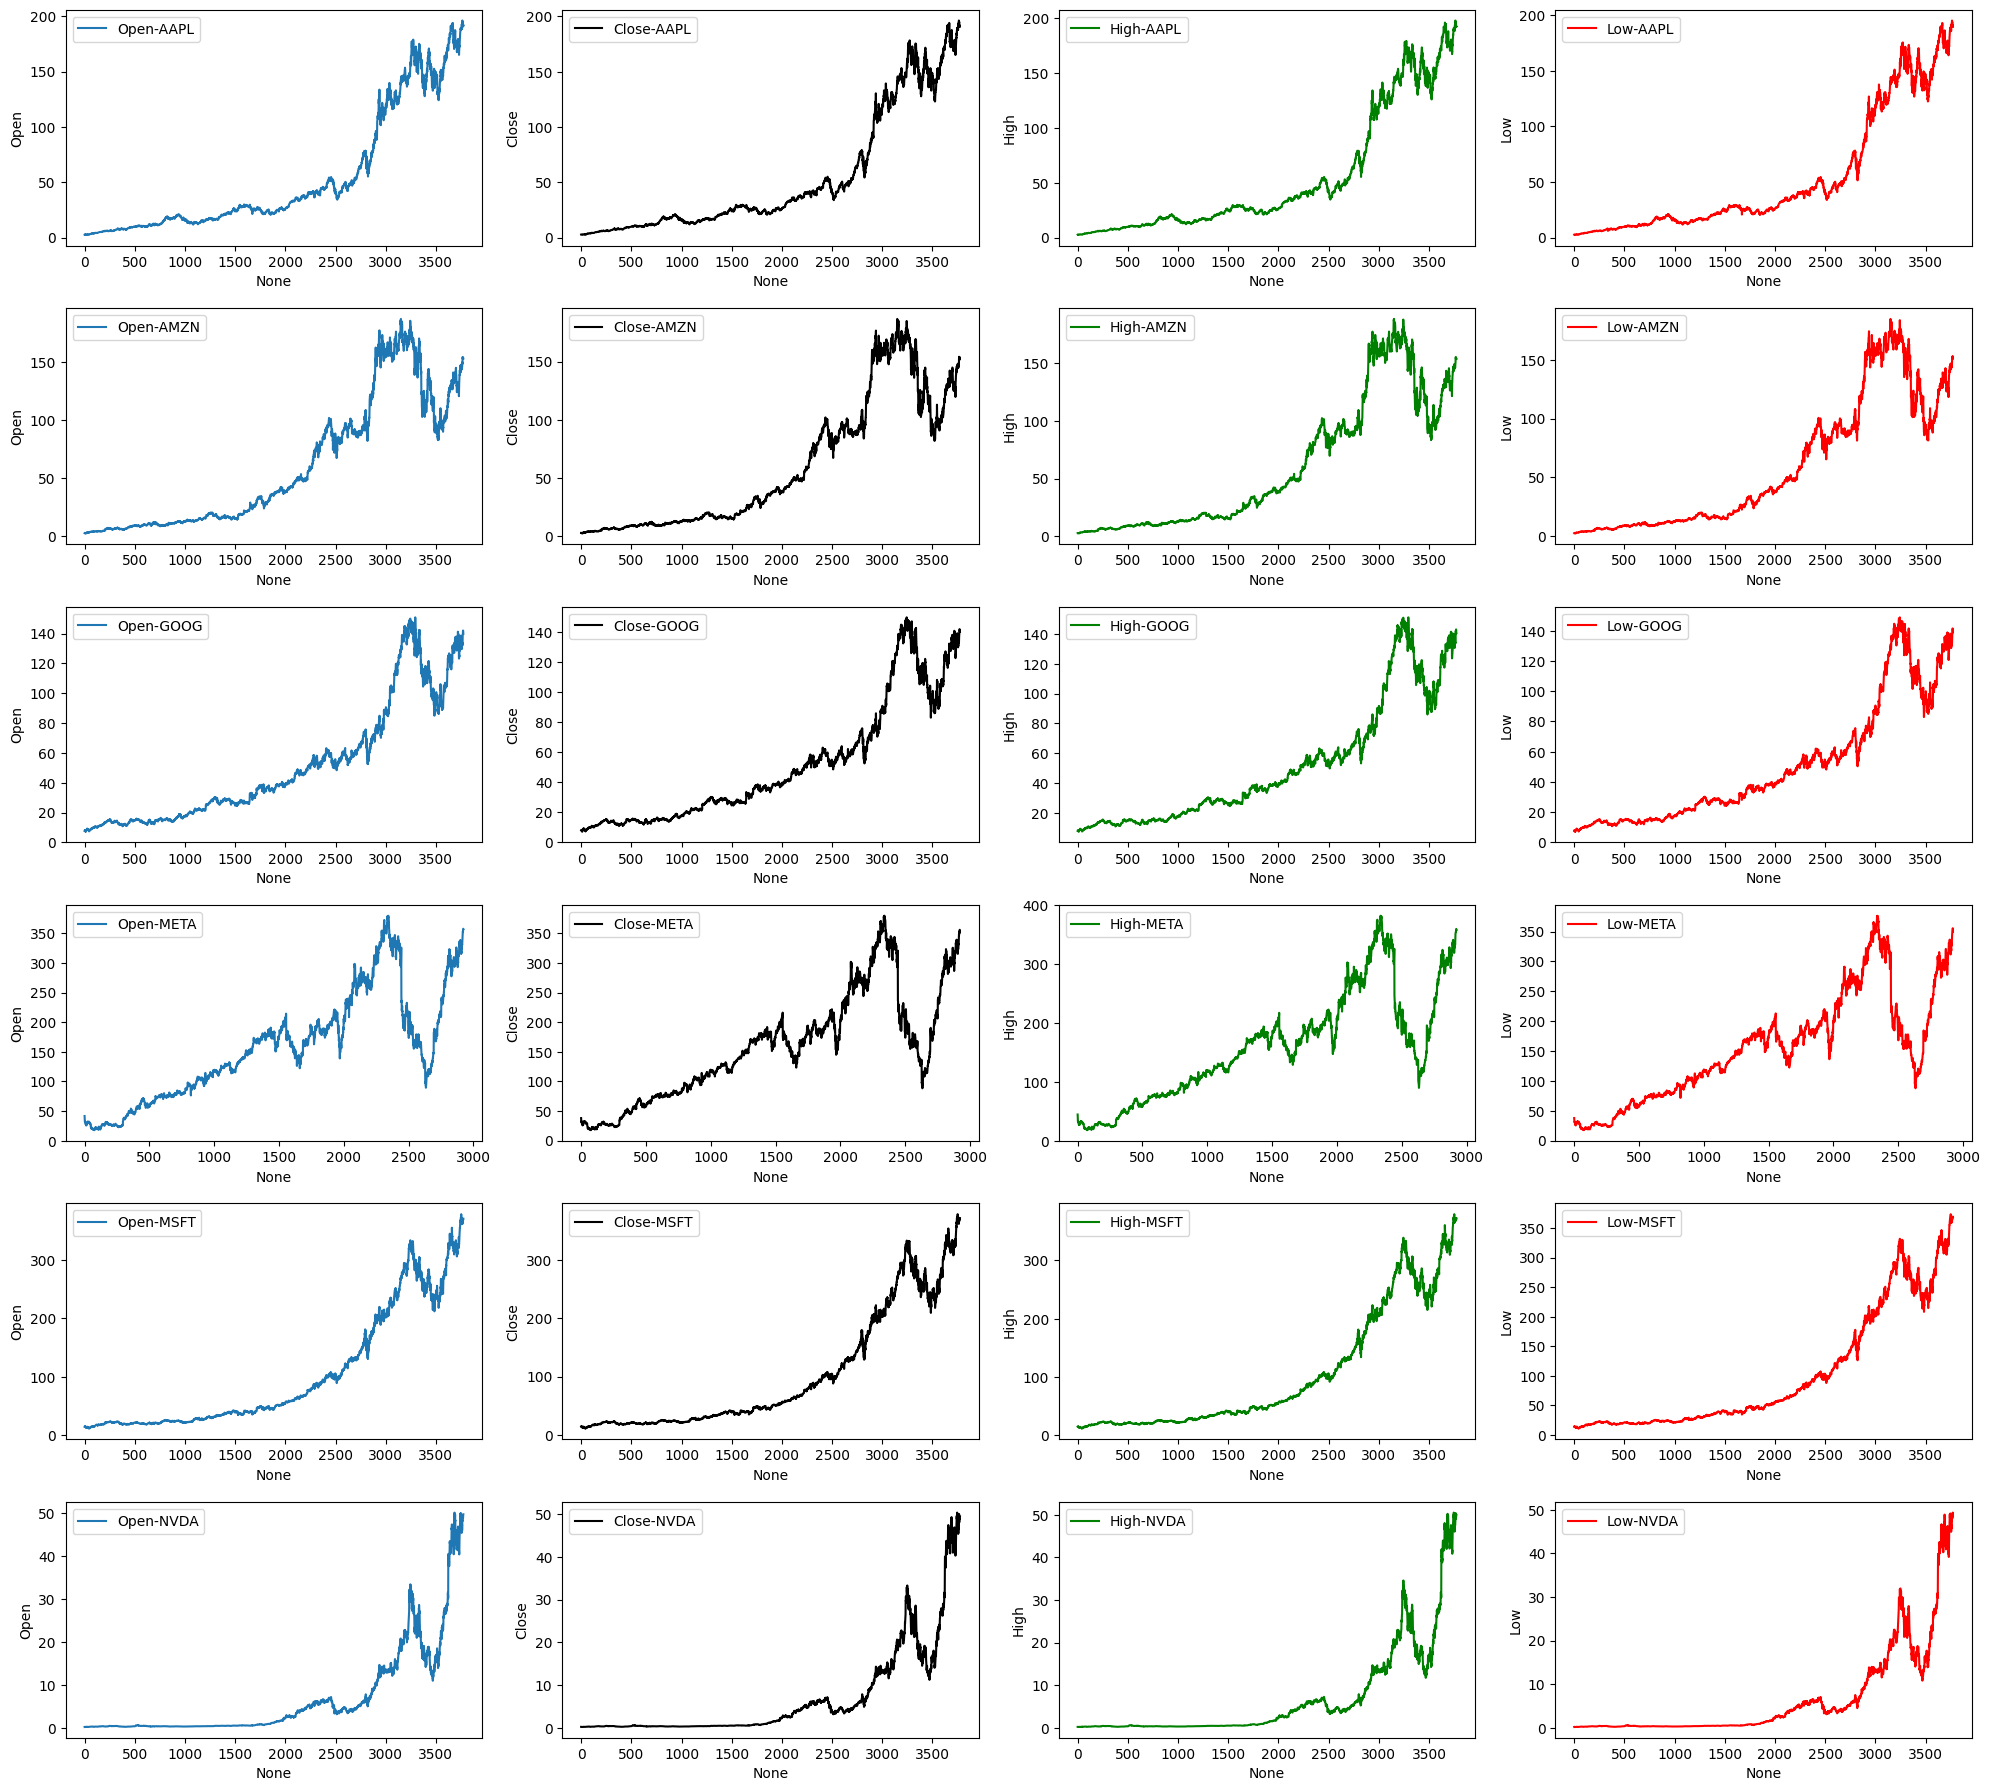

In [60]:
tickers = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]
dataframes = [appl_df, amzm_df, goog_df, meta_df, msft_df, nvda_df]

# for all tickers plot the open, close, High and low prices
fig, ax = plt.subplots(ncols=4, nrows=len(tickers), figsize=(20, 3 * len(tickers)), squeeze=True)

for idx in range(len(tickers)):
    print(dataframes[idx].shape)
    ticker = tickers[idx]
    df = dataframes[idx]
    sns.lineplot(x=df.index, y=df["Open"], ax=ax[idx][0] , label=f"Open-{ticker}")
    sns.lineplot(x=df.index, y=df["Close"], ax=ax[idx][1] , label=f"Close-{ticker}" , color="black")
    sns.lineplot(x=df.index, y=df["High"], ax=ax[idx][2] , label=f"High-{ticker}", color="green")
    sns.lineplot(x=df.index, y=df["Low"], ax=ax[idx][3] , label=f"Low-{ticker}", color="red")
plt.tight_layout(pad=1)
plt.show()


## Calculate the Moving Averages 

In [61]:
# calculating the moving averages
aapl_sma = ta.MA(appl_df['Close'], timeperiod=40)
amzm_sma = ta.MA(amzm_df['Close'], timeperiod=40)
goog_sma = ta.MA(goog_df['Close'], timeperiod=40)
meta_sma = ta.MA(meta_df['Close'], timeperiod=40)
msft_sma = ta.MA(msft_df['Close'], timeperiod=40)
nvda_sma = ta.MA(nvda_df['Close'], timeperiod=40)

# add them to a list
moving_averages = [aapl_sma, amzm_sma, goog_sma, meta_sma, msft_sma, nvda_sma]

## Visualizing the SMA along side the real value

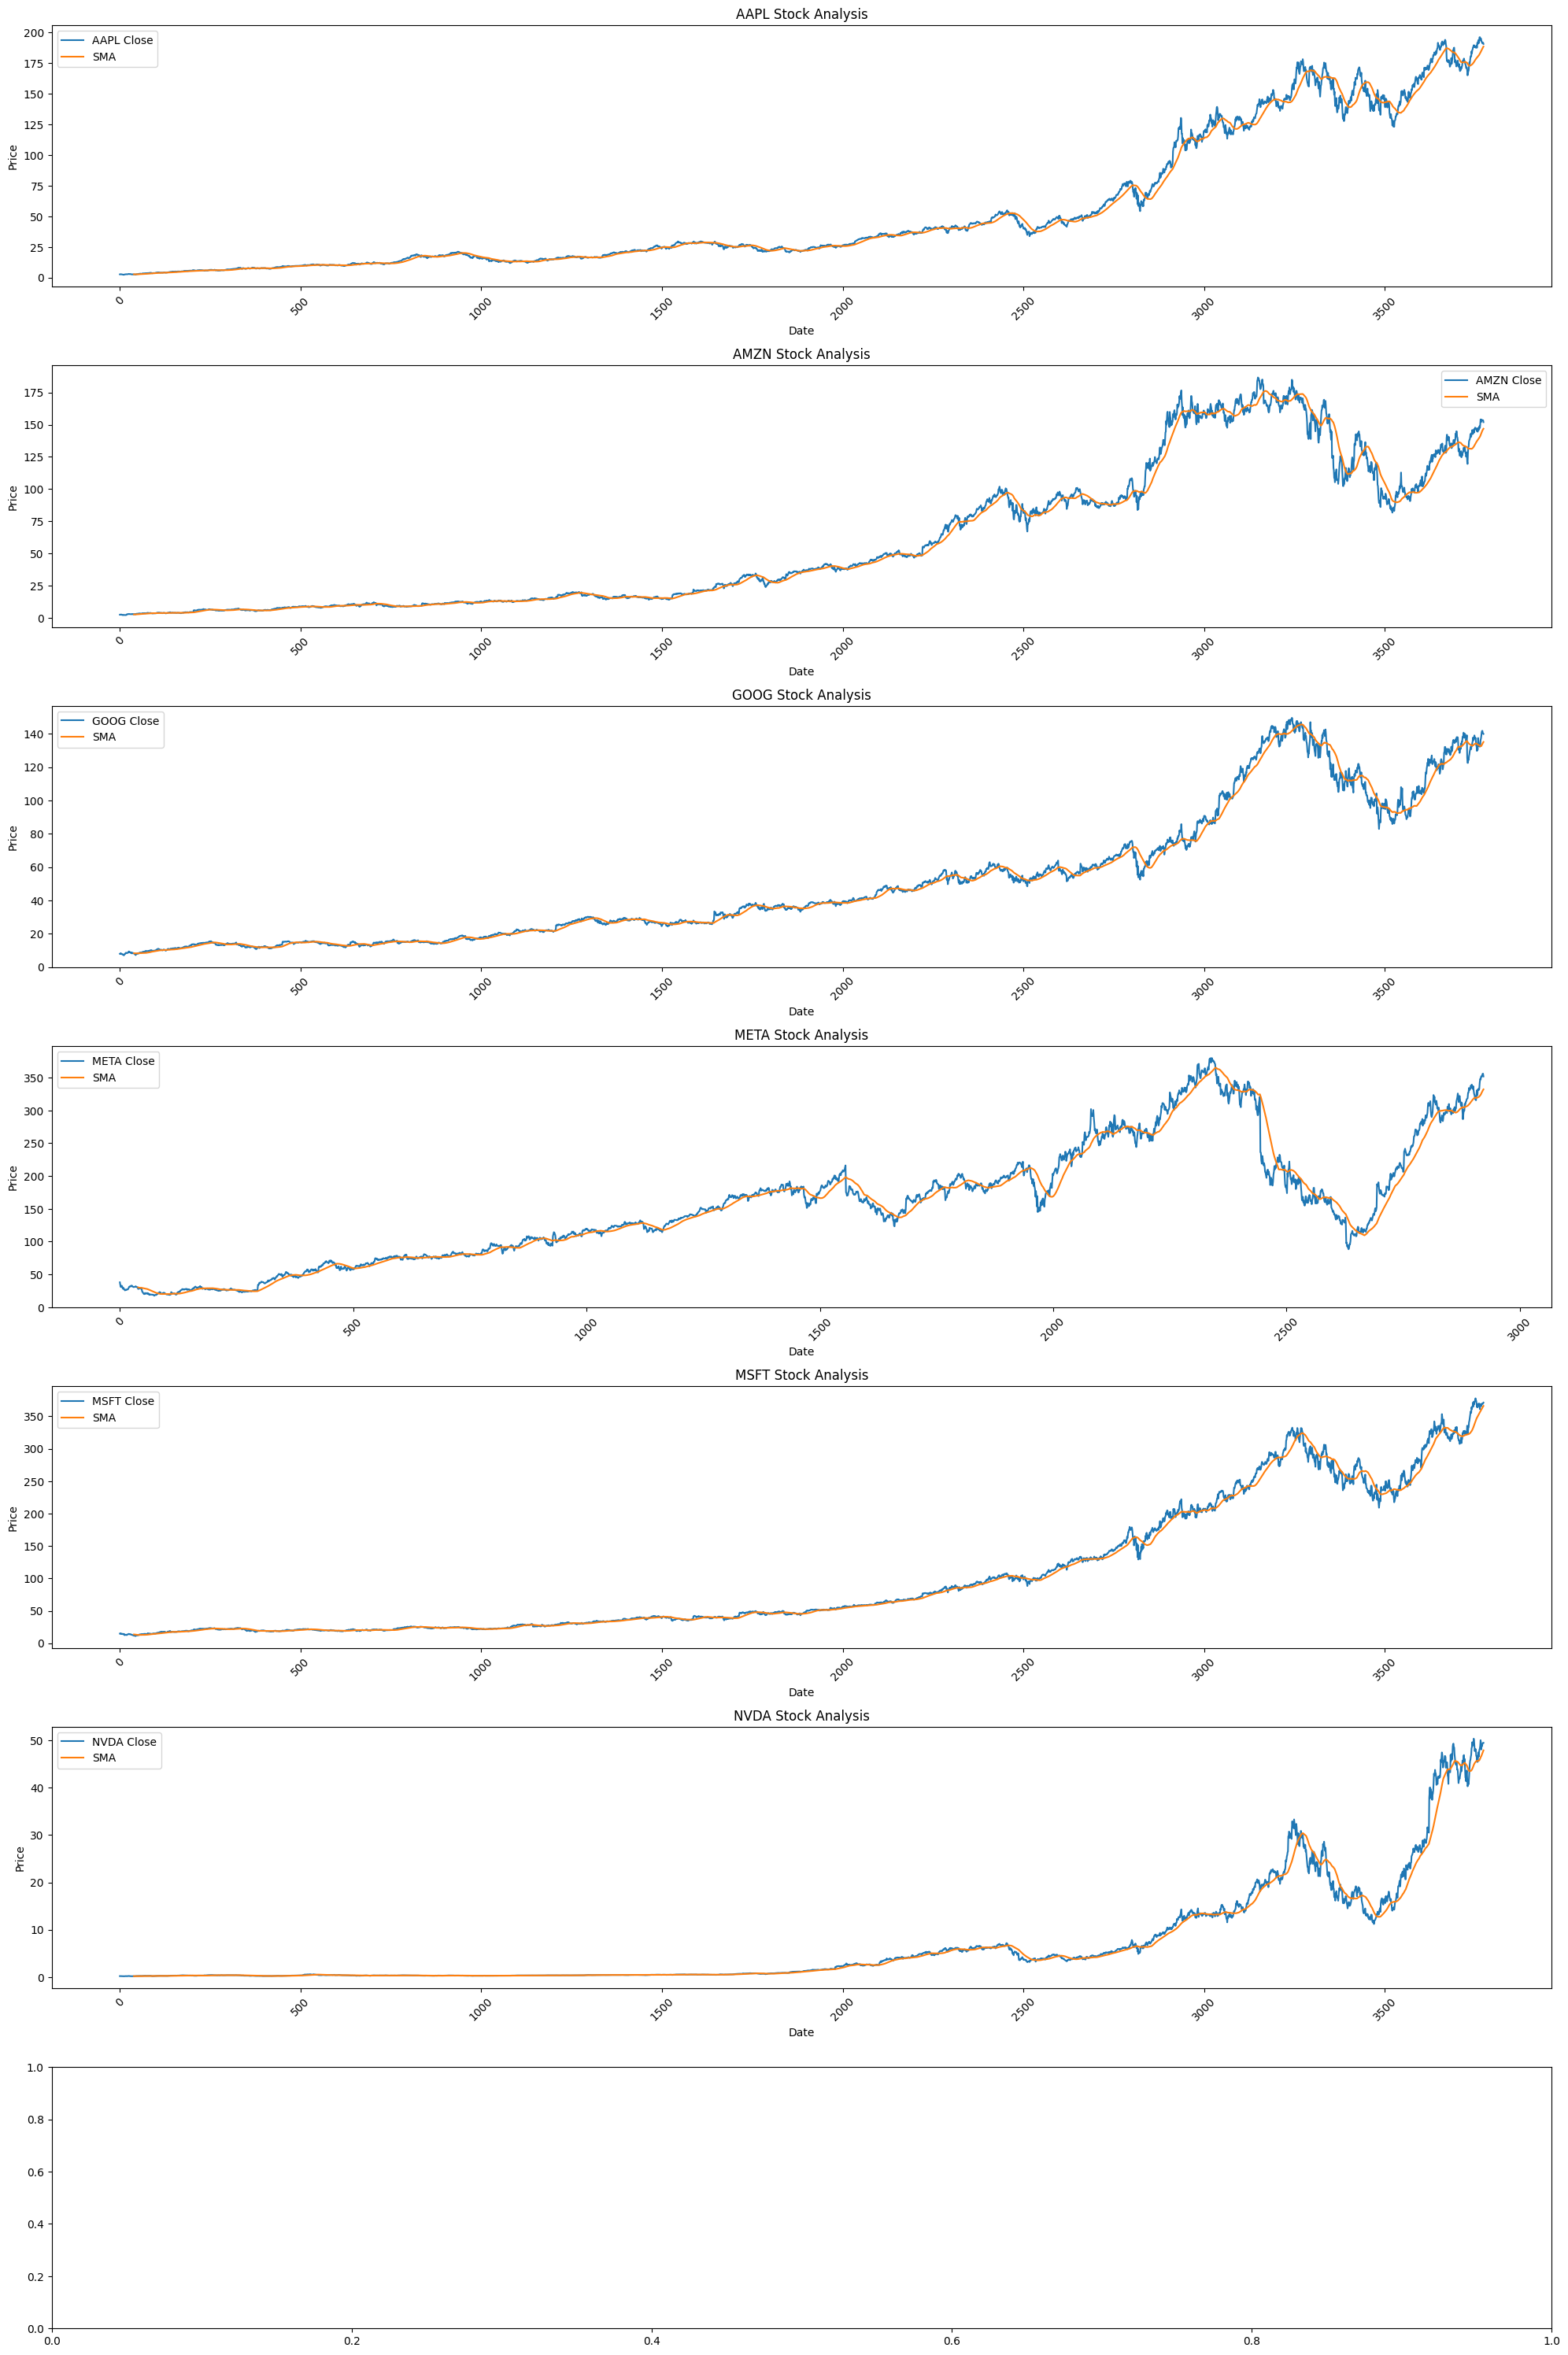

In [62]:
fig, ax = plt.subplots(ncols=1, nrows=7, figsize=(20, 30), squeeze=True)

for idx in range(len(tickers)):
    # fetch the ticker related data
    ticker = tickers[idx]
    ticker_data = dataframes[idx]
    sma = moving_averages[idx]

    # plot the close price
    sns.lineplot(x=ticker_data.index, y=ticker_data['Close'], ax=ax[idx], label=f'{ticker} Close')

    # plot the moving average
    sns.lineplot(x=sma.index, y=sma, ax=ax[idx], label='SMA')

    # Set plot title and labels
    ax[idx].set_title(f'{ticker} Stock Analysis')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Price')

    # Rotate x-ticks for better readability
    ax[idx].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout(pad=1)
plt.show()

## From the above graphs we can see that the moving average acts a support for the prices of the stocks. What I mean by this is that most of the time the real prices of the stocks will stay above/below the moving average and it comes back down/up multiple times right upto the moving average before it crosses to the other side. It some what removes the unpredictability of the price movements

## Calculating the RSI

In [63]:
# calculating the relative strength index
aapl_rsi = ta.RSI(appl_df['Close'])
amzm_rsi = ta.RSI(amzm_df['Close'])
goog_rsi = ta.RSI(goog_df['Close'])
meta_rsi = ta.RSI(meta_df['Close'])
msft_rsi = ta.RSI(msft_df['Close'])
nvda_rsi = ta.RSI(nvda_df['Close'])

# add them to a list
rsi_values = [aapl_rsi, amzm_rsi, goog_rsi, meta_rsi, msft_rsi, nvda_rsi]

## Visualizing the RSI of different stocks against real values

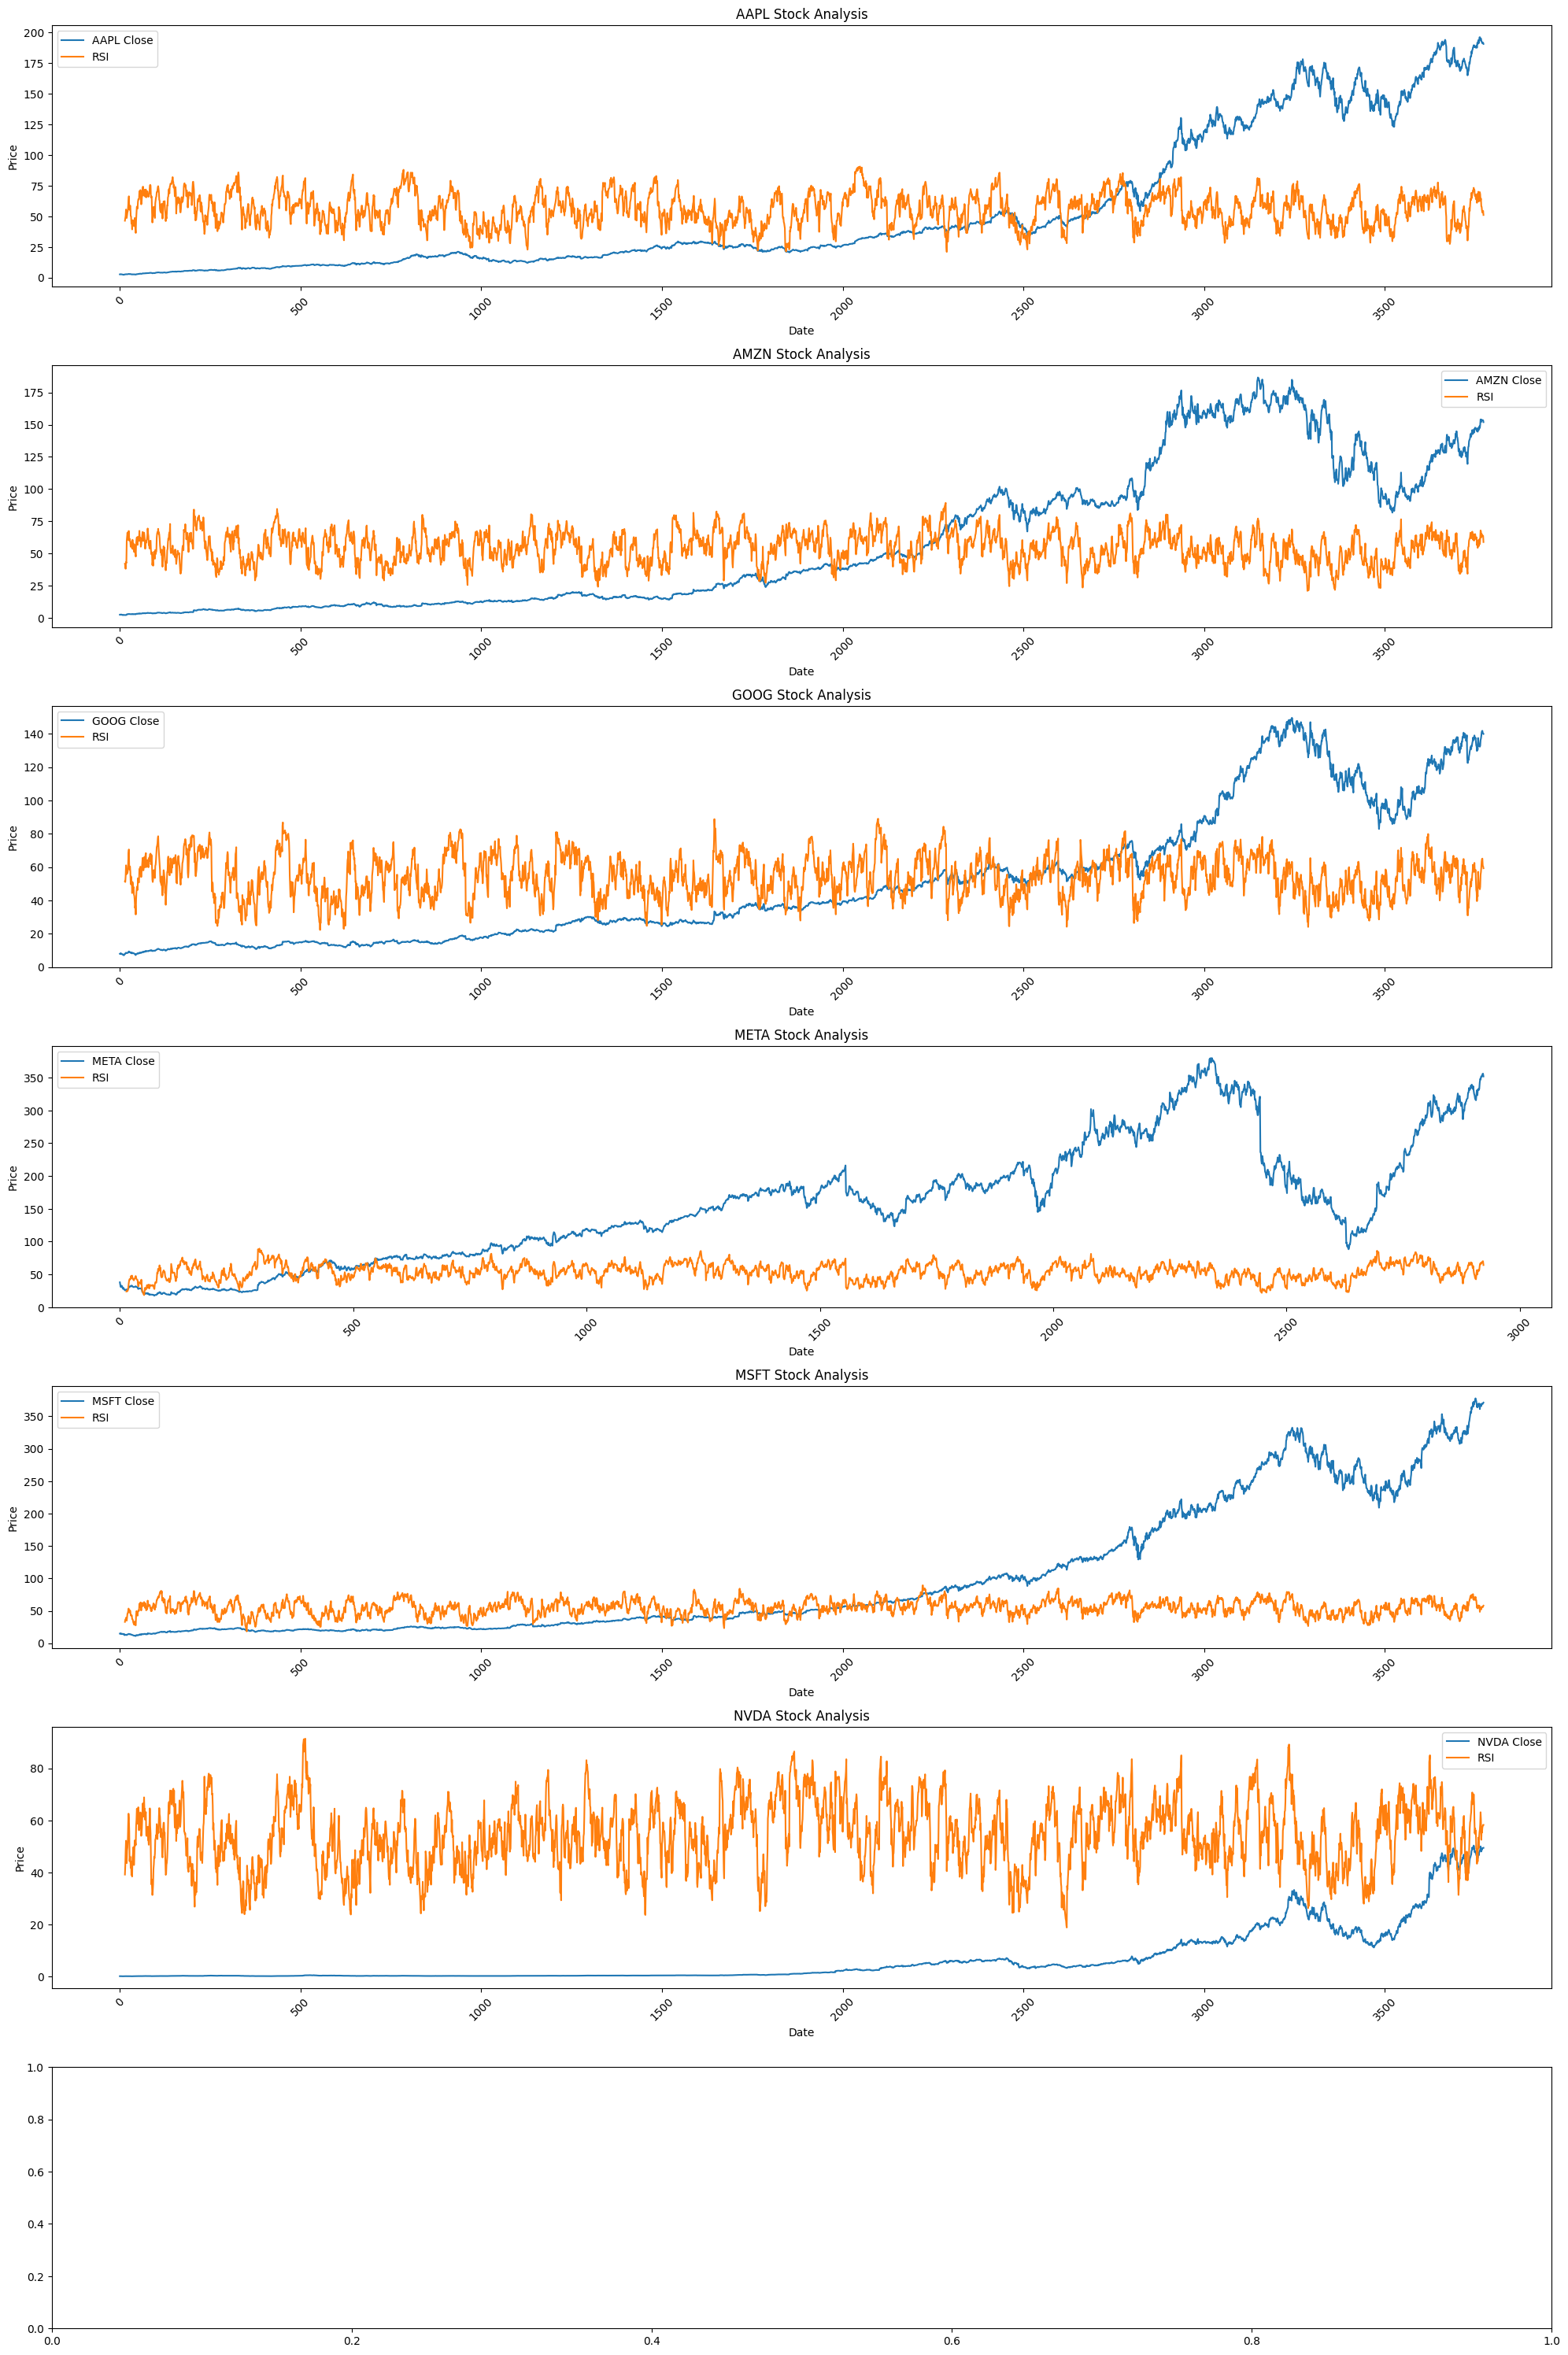

In [64]:
fig, ax = plt.subplots(ncols=1, nrows=7, figsize=(20, 30), squeeze=True)

for idx in range(len(tickers)):
    # fetch the ticker related data
    ticker = tickers[idx]
    ticker_data = dataframes[idx]
    rsi = rsi_values[idx]

    # plot the close price
    sns.lineplot(x=ticker_data.index, y=ticker_data['Close'], ax=ax[idx], label=f'{ticker} Close')

    # plot the moving average
    sns.lineplot(x=rsi.index, y=rsi, ax=ax[idx], label='RSI')

    # Set plot title and labels
    ax[idx].set_title(f'{ticker} Stock Analysis')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Price')

    # Rotate x-ticks for better readability
    ax[idx].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout(pad=1)
plt.show()

## From the RSI plots we can see that:
### The NVDA stock's RSI hovers around and above 60 and this also ### indicates that it is mostly being overbought. And we can see sudden ### dips to 40 and below that come after peaks of 90 this means that we ### should consider to sell when the value of the RSI is very high.


## Calculating MACD

### The MACD function in TA-Lib returns three results:
### MACD: The difference between the 12-day and 26-day exponential moving averages (EMA) of the closing prices.
### MACDh: The MACD histogram, which is the difference between the MACD line and the signal line.

### MACDs: The signal line, which is a 9-day EMA of the MACD line.

### Therefore we need to unpack the results into three variables for each ticker(data) we have

In [65]:
# calculating the moving averages
aapl_macd, aapl_hist, aapl_single  = ta.MACD(appl_df['Close'])
amzm_macd, amzm_hist, amzm_single = ta.MACD(amzm_df['Close'])
goog_macd, goog_hist, goog_single = ta.MACD(goog_df['Close'])
meta_macd, meta_hist, meta_single = ta.MACD(meta_df['Close'])
msft_macd, msft_hist, msft_single = ta.MACD(msft_df['Close'])
nvda_macd, nvda_hist, nvda_single = ta.MACD(nvda_df['Close'])

# add them to a list
macd_values = [aapl_macd, amzm_macd, goog_macd, meta_macd, msft_macd, nvda_macd]
hist_values = [aapl_hist, amzm_hist, goog_hist, meta_hist, msft_hist, nvda_hist]
single_values = [aapl_single, amzm_single, goog_single, meta_single, msft_single, nvda_single]

## Plotting the MACD 

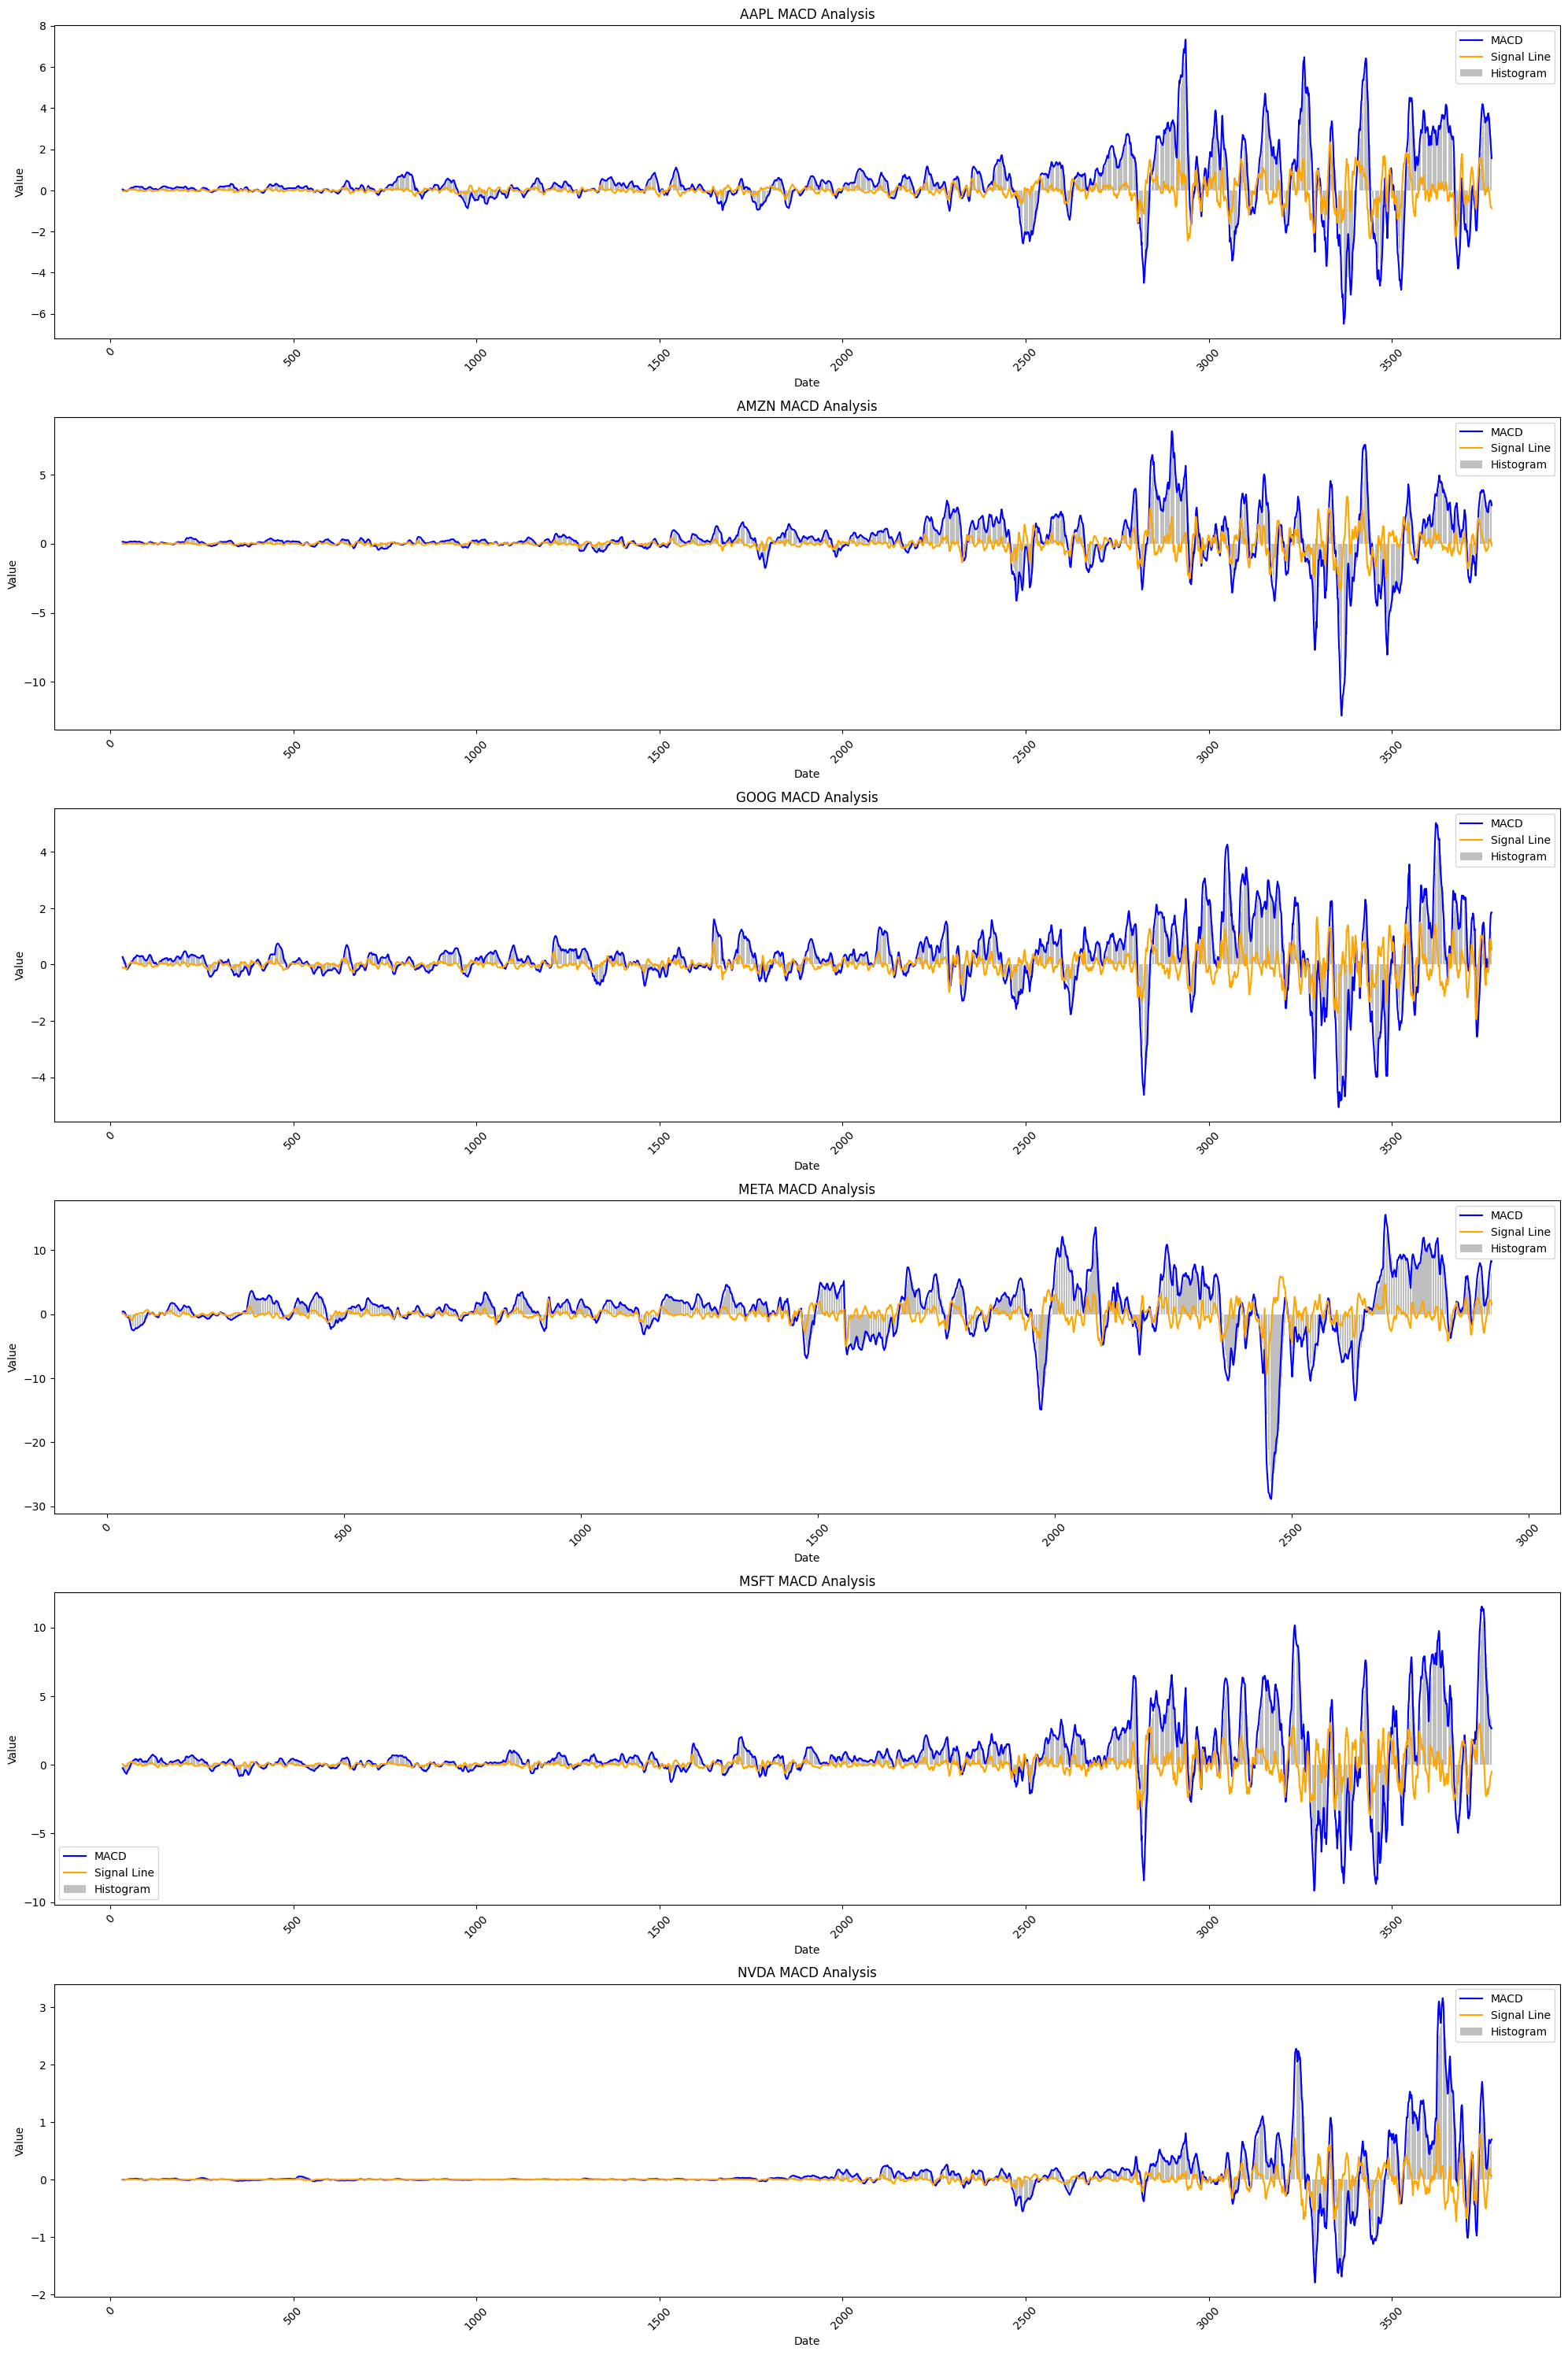

In [66]:
fig, ax = plt.subplots(ncols=1, nrows=len(tickers), figsize=(20, 30), squeeze=True)

for idx in range(len(tickers)):
    # Fetch the ticker-related data
    ticker = tickers[idx]
    ticker_data = dataframes[idx]
    macd = macd_values[idx]
    hist = hist_values[idx]
    signal = single_values[idx]

    # Plot the MACD line
    sns.lineplot(x=ticker_data.index, y=macd, ax=ax[idx], label='MACD', color='blue')

    # Plot the Signal line
    sns.lineplot(x=ticker_data.index, y=signal, ax=ax[idx], label='Signal Line', color='orange')

    # Plot the Histogram
    ax[idx].bar(ticker_data.index, hist, label='Histogram', color='gray', alpha=0.5)

    # Set plot title and labels
    ax[idx].set_title(f'{ticker} MACD Analysis')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Value')

    # Rotate x-ticks for better readability
    ax[idx].tick_params(axis='x', rotation=45)

    # Add a legend
    ax[idx].legend()

# Adjust spacing between subplots
plt.tight_layout(pad=1)
plt.show()

## Calculating  the Bollinger Bands

## The BBANDS function in TA-Lib returns three results:

## BBL: The lower Bollinger Band (typically the 20-period simple moving average minus 2 standard deviations).
## BBU: The upper Bollinger Band (typically the 20-period simple moving average plus 2 standard deviations).
## Therefore we need to unpack the results into three variables for each ticker(data) we have

In [67]:
# calculating the bollinger bands
aapl_upper, aapl_middle, aapl_lower = ta.BBANDS(appl_df['Close'])
amzm_upper, amzm_middle, amzm_lower = ta.BBANDS(amzm_df['Close'])
goog_upper, goog_middle, goog_lower = ta.BBANDS(goog_df['Close'])
meta_upper, meta_middle, meta_lower = ta.BBANDS(meta_df['Close'])
msft_upper, msft_middle, msft_lower = ta.BBANDS(msft_df['Close'])
nvda_upper, nvda_middle, nvda_lower = ta.BBANDS(nvda_df['Close'])

# add them to a list
upper_bands = [aapl_upper, amzm_upper, goog_upper, meta_upper, msft_upper, nvda_upper]
lower_bands = [aapl_lower, amzm_lower, goog_lower, meta_lower, msft_lower, nvda_lower]

## Visualizing the Bollinger Bands alongside the real values

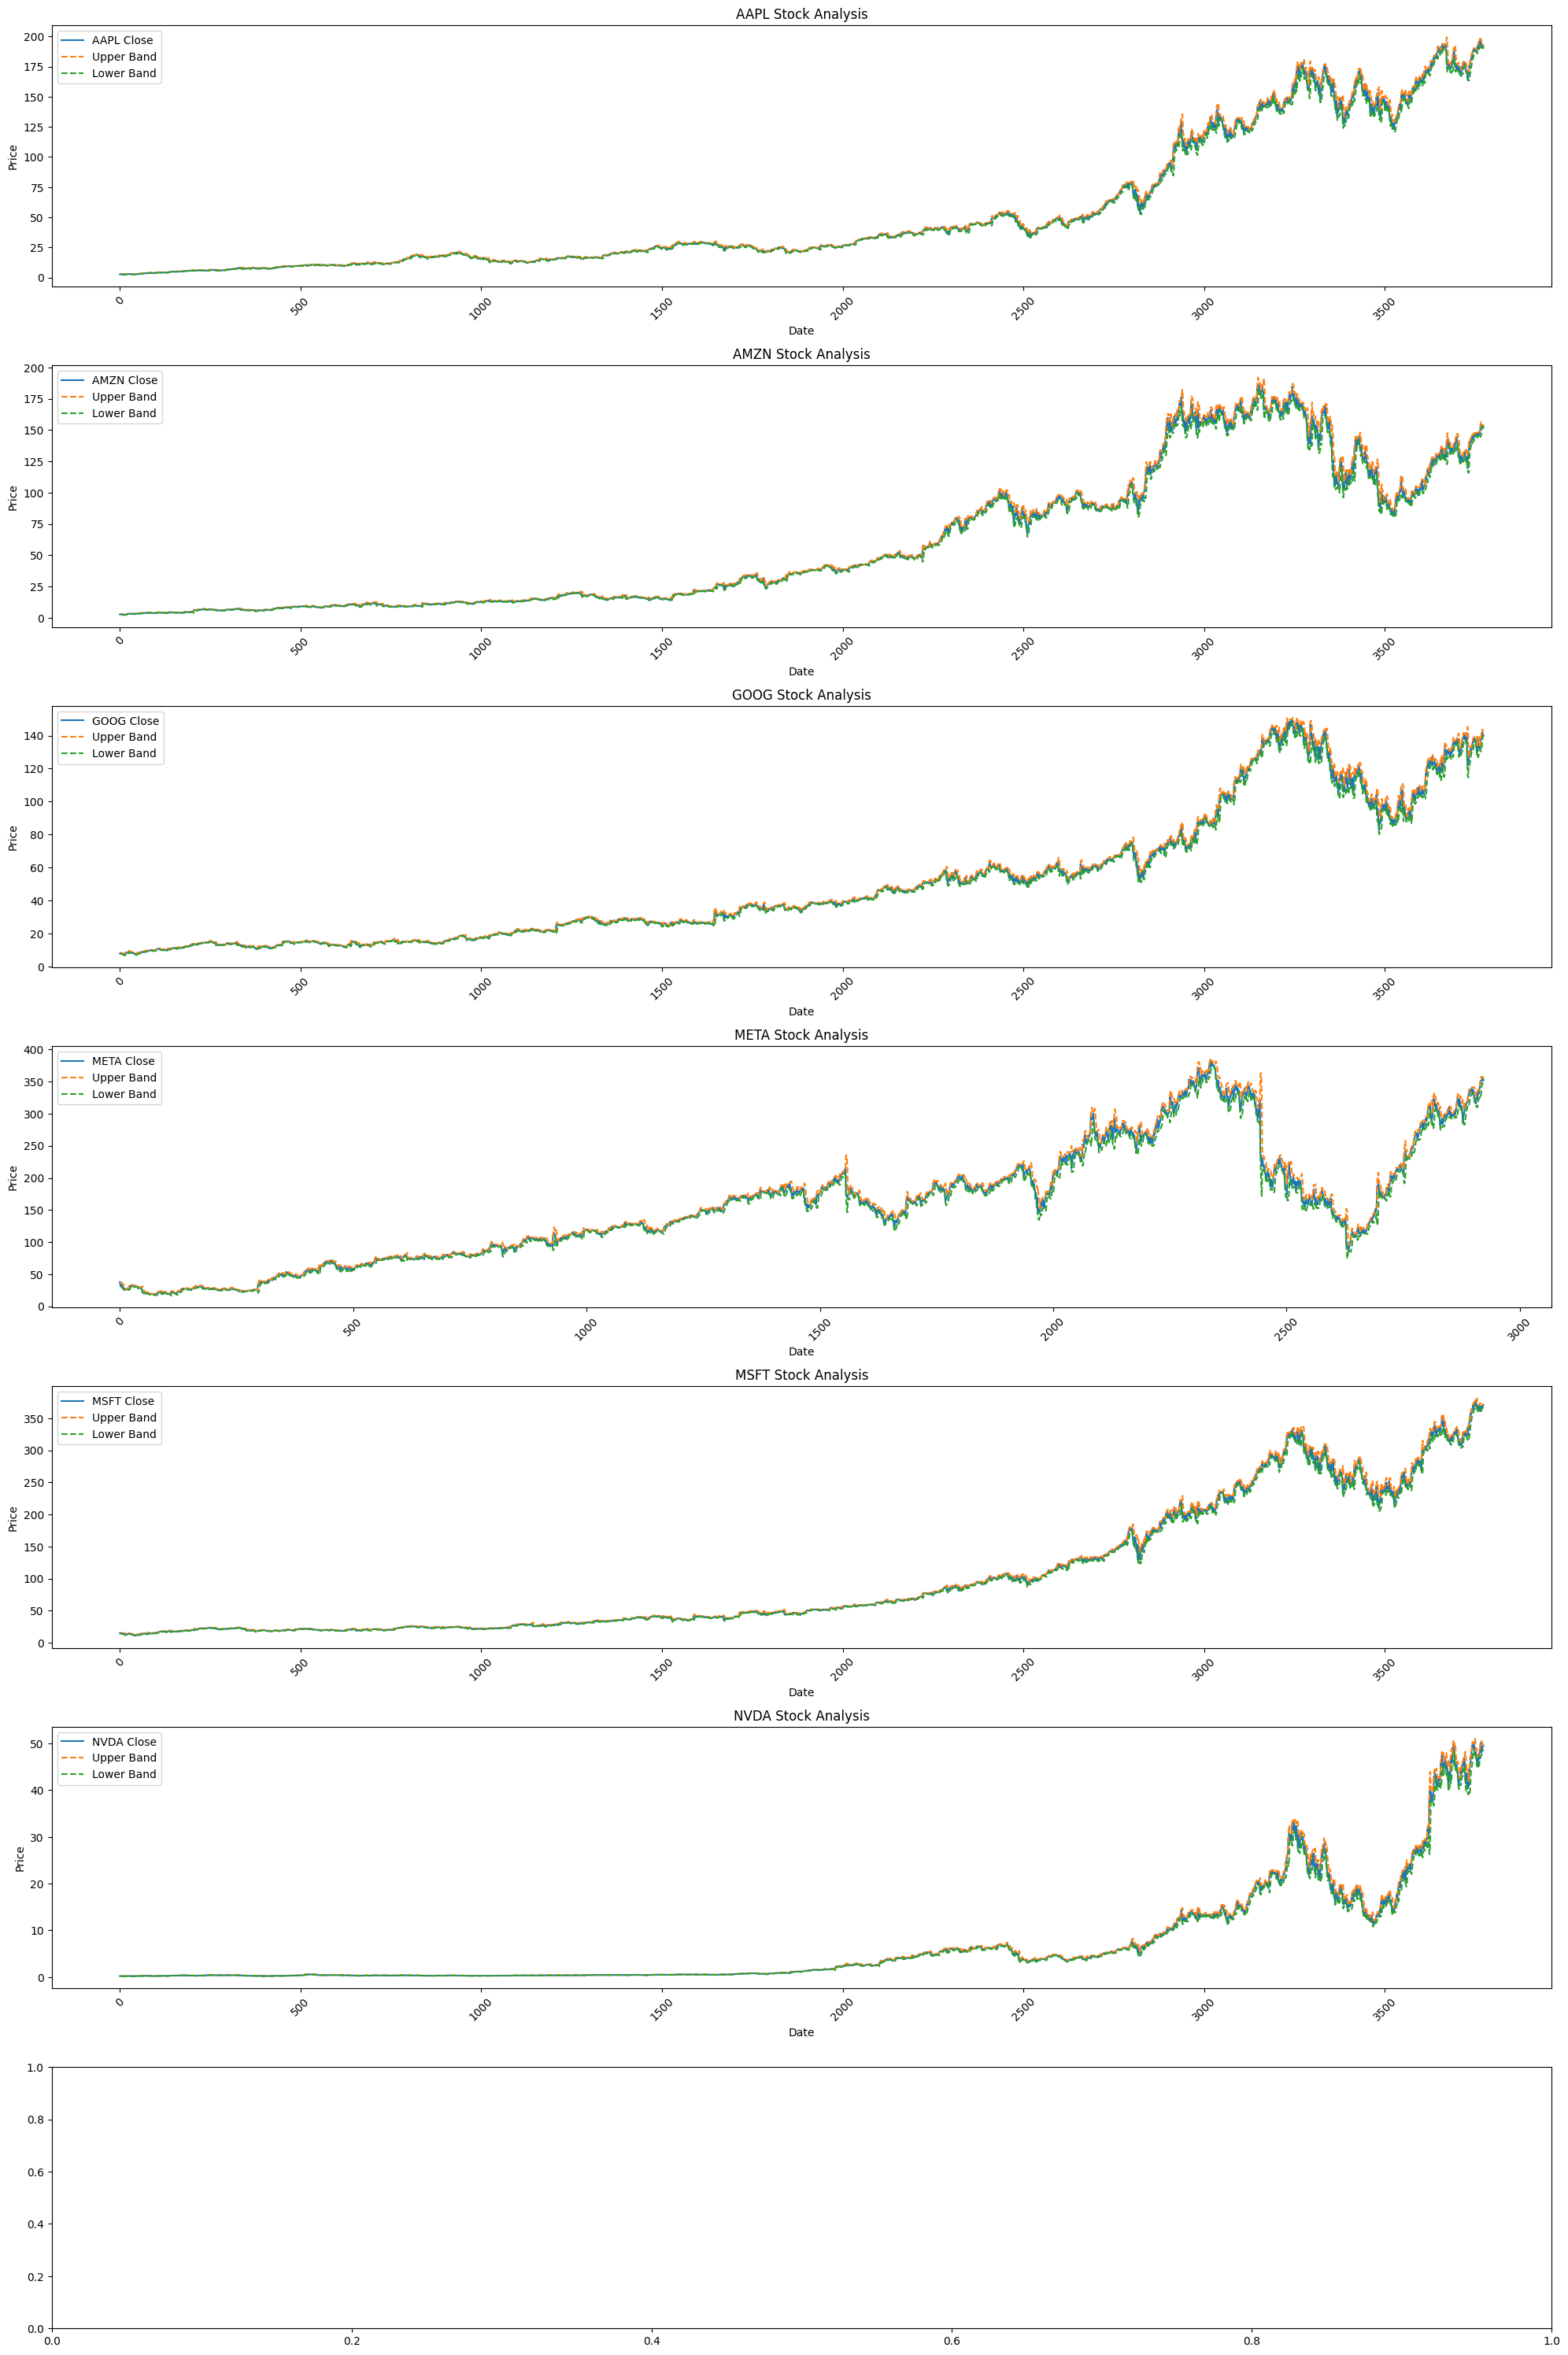

In [68]:
fig, ax = plt.subplots(ncols=1, nrows=7, figsize=(20, 30), squeeze=True)

for idx in range(len(tickers)):
    # fetch the ticker related data
    ticker = tickers[idx]
    ticker_data = dataframes[idx]
    upper_band = upper_bands[idx]
    lower_band = lower_bands[idx]

    # plot the close price
    sns.lineplot(x=ticker_data.index, y=ticker_data['Close'], ax=ax[idx], label=f'{ticker} Close')

    # plot the Bollinger Bands
    sns.lineplot(x=upper_band.index, y=upper_band, ax=ax[idx], label='Upper Band', linestyle='--')
    sns.lineplot(x=lower_band.index, y=lower_band, ax=ax[idx], label='Lower Band', linestyle='--')
    # Set plot title and labels
    ax[idx].set_title(f'{ticker} Stock Analysis')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Price')

    # Rotate x-ticks for better readability
    ax[idx].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout(pad=1)
plt.show()

### The bollinger bands help measure the volatility of the stocks, and as we can see they give a really good idea of what the stock values will follow. From the graphs its easy to conclude that the stocks chosen for this analysis are not volatile since they don't extend out of the bands set for them.


### Now let use PyPortfolioOpt to see the performance of the magnificent seven ("APPL", "AMZM", "GOOG", "META", "MSFT", "NVDA) for the historical data we have at hand

In [69]:
import yfinance as yf

In [70]:
common_min_date = None
common_max_date = None

for stock in dataframes:
    # compare the smallest days to find the common minimum date
    min_date = stock["Date"].min()
    if common_min_date is None or min_date > common_min_date: common_min_date = min_date

    # compare the smallest days to find the common maximum date
    max_date = stock["Date"].max()
    if common_max_date is None or max_date < common_max_date: common_max_date = max_date

In [71]:
# let us format our data
common_max_date = common_max_date.strftime(format="%Y-%m-%d")
common_min_date = common_min_date.strftime(format="%Y-%m-%d")
print(f"We will investigate the performance of strocks from {common_min_date} to {common_max_date}")

We will investigate the performance of strocks from 2012-05-18 to 2023-12-29


In [72]:
from pypfopt import risk_models, expected_returns , EfficientFrontier

In [73]:
# Set the Date column as the index for each DataFrame
for df in dataframes:
    df.set_index('Date', inplace=True)

# Combine the Close prices into a single DataFrame
aligned_data = pd.DataFrame({
    'AAPL': appl_df['Close'],
    'AMZN': amzm_df['Close'],
    'GOOG': goog_df['Close'],
    'META': meta_df['Close'],
    'MSFT': msft_df['Close'],
    'NVDA': nvda_df['Close']
})

# Drop rows with missing values (optional, or use .fillna() to handle missing data)
aligned_data.dropna(inplace=True)

# Print the aligned data
print(aligned_data.head())

                 AAPL     AMZN       GOOG       META       MSFT      NVDA
Date                                                                     
2012-05-18  15.906649  10.6925  14.852311  37.995762  23.269148  0.276899
2012-05-21  16.833374  10.9055  15.191461  33.821495  23.650736  0.281713
2012-05-22  16.704119  10.7665  14.862206  30.810066  23.658686  0.278275
2012-05-23  17.111689  10.8640  15.076430  31.803938  23.141958  0.285151
2012-05-24  16.954540  10.7620  14.932956  32.827625  23.110147  0.277587


In [75]:
# # Forward-fill missing values
aligned_data.fillna(method='ffill', inplace=True) 

C:\Users\yeget\AppData\Local\Temp\ipykernel_21128\1891665435.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aligned_data.fillna(method='ffill', inplace=True)


## Let us check the weights of our stocks if we where to use the historical data as indicator
## Our aim is to obtain a risk adjusted return given our historical data.

In [76]:
# Calculate the mean historical returns and the annualized sample covariance matrix
mean_historical_returns = expected_returns.mean_historical_return(aligned_data)
annualized_sample_cov = risk_models.sample_cov(aligned_data)

# Create the Efficient Frontier object
efficient_frontier = EfficientFrontier(mean_historical_returns, annualized_sample_cov)

# Maximize the Sharpe ratio to get the optimal weights
weights = efficient_frontier.max_sharpe()

# Convert the weights to a dictionary for better readability
weights = dict(zip(tickers, weights.values()))

# Print the weights
print(weights)

{'AAPL': 0.074494882043305, 'AMZN': 0.0524501378585272, 'GOOG': 0.0, 'META': 0.0, 'MSFT': 0.3096409129581436, 'NVDA': 0.5634140671400243}


## So given the history of our stocks it is best to maintain a protfollio where:

## 56.3% of our portfollio consists of Nvidia stock
## 30.9% of our portfollio consists of Miscrosoft stock
## 7.4% of our portfollio consists of  Apple stock
## 5.24% of our portfollio consists of Amazon stock

## portfolio performance

In [78]:

expected_return, portfolio_volatility, sharpe_ratio= efficient_frontier.portfolio_performance()

print(f"Expected return: {expected_return}")
print(f"Portfolio volatility: {portfolio_volatility}")
print(f"Sharpe ratio: {sharpe_ratio}")

Expected return: 0.4326011188690309
Portfolio volatility: 0.32734507656808554
Sharpe ratio: 1.3215446018142656


## This will return our expected returns, the volatility of our portfolio and the sharpe ratio if we invested equally on all of our stocks and our risk free profil is about 2%

## Now that we have gotten the recommended weights let us calculate the sharpe ratio of investing equal amounts between the stocks and compare it to the recommended weigths

In [81]:

# give equal weights to all tickers
weight_array = np.array([1/len(tickers) for _ in tickers])

# Calculate the expected portfolio return
portfolio_return = np.dot(mean_historical_returns.values, weight_array)

# Calculate the portfolio volatility
portfolio_volatility = np.sqrt(np.dot(weight_array.T, np.dot(annualized_sample_cov, weight_array)))

# Assuming a risk-free rate, typically around 0.01 (1%) in current market conditions
risk_free_rate = 0.02

# Calculate the Sharpe ratio
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print("Expected portfolio return:", portfolio_return)
print("Portfolio volatility:", portfolio_volatility)
print("Sharpe ratio:", sharpe_ratio)

Expected portfolio return: 0.29249405743397
Portfolio volatility: 0.257863609313839
Sharpe ratio: 1.0567371571314843


## We can see that when we divide the our money equally amongst the stocks instead of going with the recommended portfolio weights:

The expected portfolio return decreases from 43.2% to 29.2%
The protfolio volatility decreases from 32.7% to 25.7%, which is a good thing. And it does because we have a diversified portfolio compared to the recommeded one
The sharpe ration decreases from 1.3 to 1.0